6.74_explore_data_descriptive_statistics_dig_info

这一节，我们会学习如何用Python，对数值数据进行描述统计学分析。

描述统计学的分析对象，很多时候是一维数据，像Python的列表，NumPy的一维数组，Pandas的Series，DataFrame的某列。

In [1]:
import pandas as pd
import numpy as np

In [4]:
# 全班某天测量的体温数据
df = pd.read_csv('temperature.csv')
df

,姓名,体温
0,Tom,37.8
1,Jerry,36.8
2,Lucy,37.0
3,Emma,37.2
4,John,36.6
5,Alice,37.0
6,Bob,37.0
7,David,36.1
8,Sam,37.5
9,Alex,37.3


### 一、计算集中趋势指标

1. 平均数

   调用Series类的mean方法

In [5]:
df.体温.mean()

37.12413793103448

说明这个班的体温大概集中在37.1度

2. 调用Series类的median方法

In [6]:
df['体温'].median()

37.0

数据中有两个人体温显著更高，拉高了平均值，中位数不太会收到异常值的影响

3. 众数

   调用Series类的mode方法

   **mode方法返回的不是一个数字，而是一个Series，因为众数可能有多个，所以用Series去囊括多个数字结果**

In [7]:
df.体温.mode()

0    37.0
Name: 体温, dtype: float64

说明办理人的体温倾向于37度

### 二、计算离散趋势指标

1. 极差

   - 可以用Series的max和min函数去做减法
  
   - 用NumPy数组的ptp方法，会返回极差结果，需要先用NumPy库的array方法将Pandas的Series转换成NumPy数组

In [9]:
df.体温.max() - df.体温.min()

3.1000000000000014

In [10]:
np.array(df.体温).ptp()

3.1000000000000014

**浮点数精度误差**

**以上计算结果多了0.0000000000000014，这个误差源自浮点数的精度问题，是二进制计算和转换造成的**

2. 方差/标准差

   - 方差：调用Series的var方法
  
   - 标准差：调用Series的std方法 

In [11]:
df.体温.var()

0.4518965517241383

In [12]:
df.体温.std()

0.6722325131412035

3. 四分位距

   Series的quantile方法，可以用来计算任意百分位数，比如传入10%，就能得到刚好大于数据里10%数值的那个数字

   计算四分位距，用75%分位数减去25%分位数
   

In [13]:
df.体温.quantile(0.75) - df.体温.quantile(0.25)

0.5

### 三、分布形状

如果我们把各个数值出现的次数，绘制成直方图，就能看见数据的分布模式

调用Series的plot方法，可选参数`kind = 'hist'`，表示直方图

<Axes: ylabel='Frequency'>

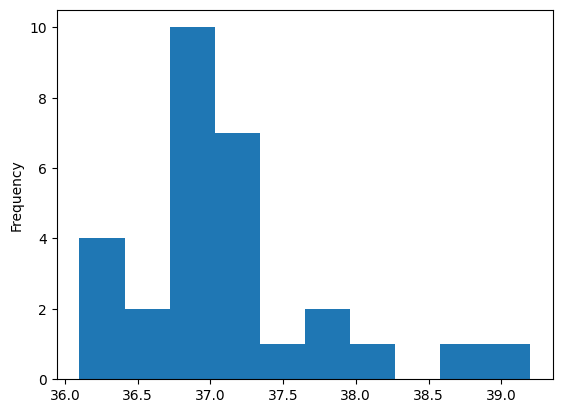

In [17]:
df['体温'].plot(kind='hist')

现在只能很勉强的看出分布形状，当数据观察值很少的时候，分布形状不会特别明显，而且很容易受到异常值的影响；但数据观察值数量越大，越容易看出分布形状